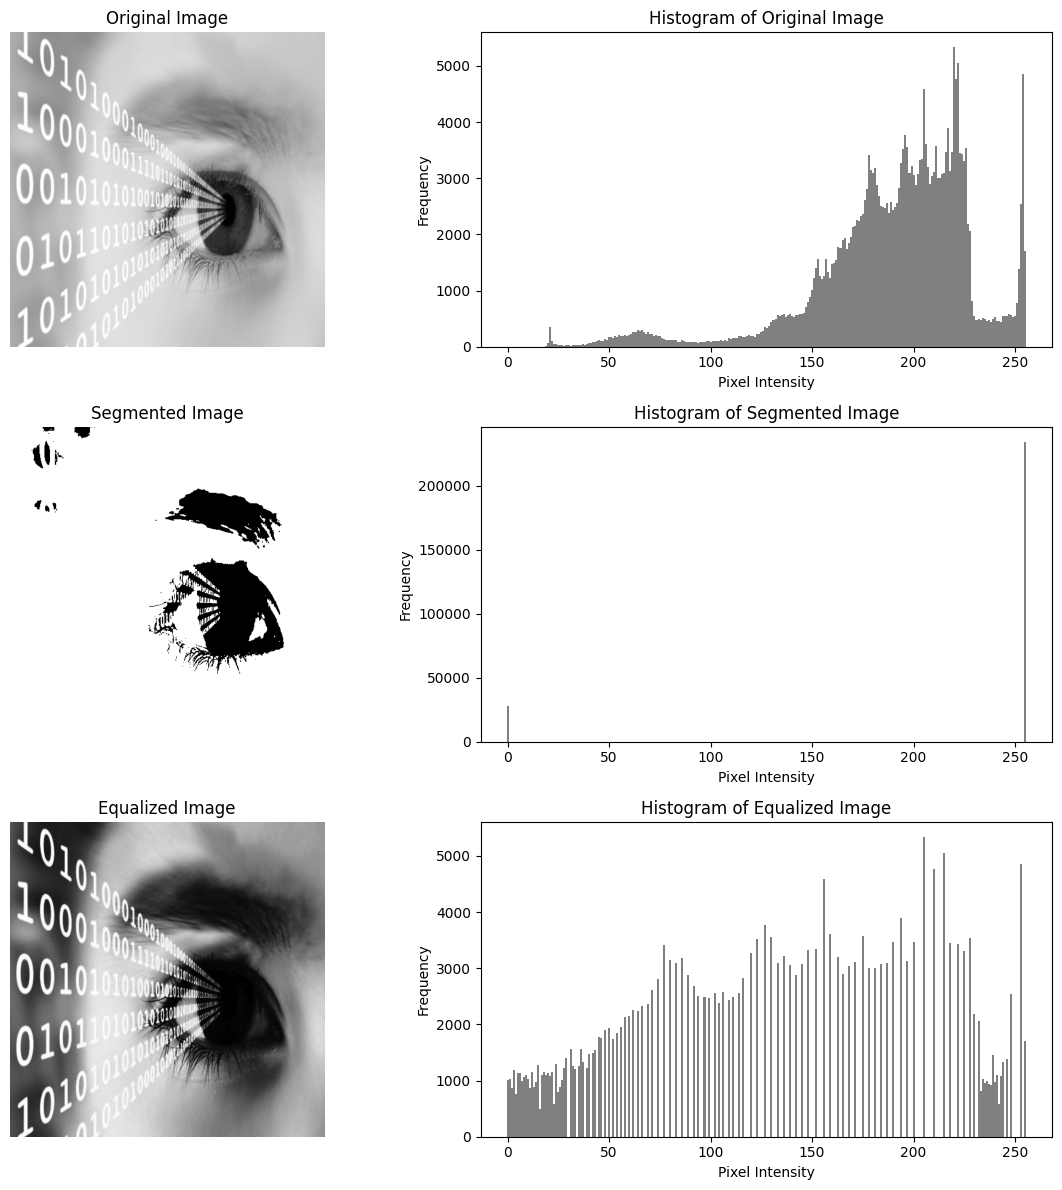

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def generate_histogram(image):
    """
    Generate a histogram for the given grayscale image.

    Parameters:
        image (numpy.ndarray): Input grayscale image.

    Returns:
        numpy.ndarray: Histogram of pixel intensities.
    """
    histogram = np.zeros(256)  # Array for pixel intensity counts (0–255)
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            histogram[image[i, j]] += 1
    return histogram

def manual_histogram_equalization(image):
    """
    Perform histogram equalization manually on the input image.

    Parameters:
        image (numpy.ndarray): Input grayscale image.

    Returns:
        numpy.ndarray: Equalized image.
    """
    # Calculate histogram
    histogram = generate_histogram(image)

    # Normalize the histogram
    normalized_histogram = histogram / (image.shape[0] * image.shape[1])

    # Calculate the cumulative distribution function (CDF)
    cdf = np.cumsum(normalized_histogram)

    # Scale CDF to map to pixel intensity range [0, 255]
    cdf_scaled = (cdf * 255).astype(np.uint8)

    # Map the original pixel values to the equalized values using the scaled CDF
    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            equalized_image[i, j] = cdf_scaled[image[i, j]]

    return equalized_image

def plot_histograms_and_images(original_image, segmented_image, equalized_image):
    """
    Plot histograms and display the original, segmented, and equalized images side by side.

    Parameters:
        original_image (numpy.ndarray): Original grayscale image.
        segmented_image (numpy.ndarray): Segmented binary image.
        equalized_image (numpy.ndarray): Image after histogram equalization.
    """
    # Generate histograms
    original_histogram = generate_histogram(original_image)
    segmented_histogram = generate_histogram(segmented_image)
    equalized_histogram = generate_histogram(equalized_image)

    # Plot images and histograms
    plt.figure(figsize=(18, 12))

    # Original image and histogram
    plt.subplot(3, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(3, 3, 2)
    plt.bar(range(256), original_histogram, color='gray', width=1)
    plt.title('Histogram of Original Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Segmented image and histogram
    plt.subplot(3, 3, 4)
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image')
    plt.axis('off')

    plt.subplot(3, 3, 5)
    plt.bar(range(256), segmented_histogram, color='gray', width=1)
    plt.title('Histogram of Segmented Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Equalized image and histogram
    plt.subplot(3, 3, 7)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.subplot(3, 3, 8)
    plt.bar(range(256), equalized_histogram, color='gray', width=1)
    plt.title('Histogram of Equalized Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

def plot_histogram_and_segment(image, threshold):
    """
    Perform threshold segmentation and return the segmented binary image.

    Parameters:
        image (numpy.ndarray): Input grayscale image.
        threshold (int): Threshold value for segmentation.

    Returns:
        numpy.ndarray: Segmented binary image.
    """
    # Apply threshold segmentation
    segmented_image = np.where(image > threshold, 255, 0).astype(np.uint8)
    return segmented_image

# Load a 512x512 grayscale image
image_path = "img.jpg"  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    raise ValueError("Could not load the image. Please check the file path.")

# Resize image if not 512x512
if original_image.shape != (512, 512):
    original_image = cv2.resize(original_image, (512, 512), interpolation=cv2.INTER_AREA)

# Choose a threshold value (can be determined from the histogram)
threshold_value = 150  # Example value, adjust as needed based on histogram observation

# Perform segmentation
segmented_image = plot_histogram_and_segment(original_image, threshold_value)

# Perform histogram equalization manually
equalized_image = manual_histogram_equalization(original_image)

# Plot original, segmented, and equalized images with histograms
plot_histograms_and_images(original_image, segmented_image, equalized_image)
